### Problem Statement
Trip duration is the most fundamental measure in all modes of transportation. Hence, it is crucial to predict the trip-time precisely for the advancement of Intelligent Transport Systems (ITS) and traveller information systems. Data mining techniques are employed to predict the trip duration of rental bikes in Seoul Bike sharing system. The rental duration prediction needs to be carried out with the combination of Seoul Bike data and weather data.

### Importing the Libraries 

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as smf
from numpy import sqrt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

### About the DataSet

The Data used include trip duration, trip distance, pickup-dropoff latitude and longitude, temperature, precipitation, wind speed, humidity, solar radiation, snowfall, ground temperature and 1-hour average dust concentration.

### Loading the dataset

In [3]:
data = pd.read_csv("Data.csv")
data.Distance = data.Distance/1000 # Distance is in meters converting to Km
data.head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,3,0.05,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,0,0,0,1,1,0,4,0,-3.2,0.0,0.5,40,0.0,0.0,-2.2,25
1,24,7.67,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,0,0,0,1,1,0,25,0,-3.2,0.0,0.5,40,0.0,0.0,-2.2,25
2,8,1.39,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,0,0,0,1,1,0,9,0,-3.2,0.0,0.5,40,0.0,0.0,-2.2,25
3,8,1.82,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,0,1,0,1,1,0,10,0,-3.2,0.0,0.5,40,0.0,0.0,-2.2,25
4,4,0.85,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,0,1,0,1,1,0,6,0,-3.2,0.0,0.5,40,0.0,0.0,-2.2,25


## Interpretation model

Selecting all the features for building an Interpretation model

In [4]:
featureNames = data.columns
data['const'] = 1
featureNames = ['const'] + list(featureNames)
featureNames.remove('Duration')
featureNames

['const',
 'Distance',
 'PLong',
 'PLatd',
 'DLong',
 'DLatd',
 'Haversine',
 'Pmonth',
 'Pday',
 'Phour',
 'Pmin',
 'PDweek',
 'Dmonth',
 'Dday',
 'Dhour',
 'Dmin',
 'DDweek',
 'Temp',
 'Precip',
 'Wind',
 'Humid',
 'Solar',
 'Snow',
 'GroundTemp',
 'Dust']

Building an Interpretation model(OLS) 

In [5]:
statsModelsCoefs = smf.OLS(data['Duration'], data[featureNames]).fit()
print(statsModelsCoefs.summary())

                            OLS Regression Results                            
Dep. Variable:               Duration   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                 1.866e+05
Date:                Mon, 11 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:08:02   Log-Likelihood:            -3.9509e+06
No. Observations:             1048575   AIC:                         7.902e+06
Df Residuals:                 1048550   BIC:                         7.902e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -51.5829     18.749     -2.751      0.0

### Observations
- The model has an overall explanatory power of 81%.
- For the above model const, Pmonth, Pday, Phour, Dmonth, Dday,Dhour columns are significant.
- The columns PLong, PLatd, DLong, DLatd, PDweek, DDweek , Temp, Precip, Wind, Humid, Solar, Snow, GroundTemo and Dust play less significant role.

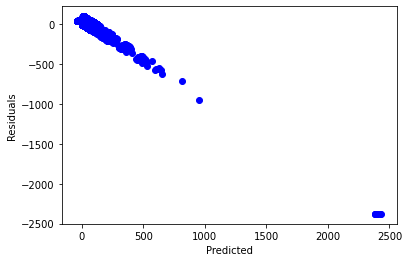

In [6]:
yhat = statsModelsCoefs.predict(data[featureNames])
resid = data['Duration'] - yhat

plt.plot(yhat, resid, 'bo')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

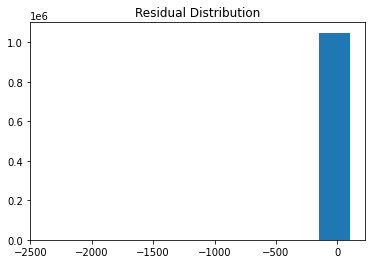

In [7]:
plt.hist(resid)
plt.title('Residual Distribution')
plt.show()

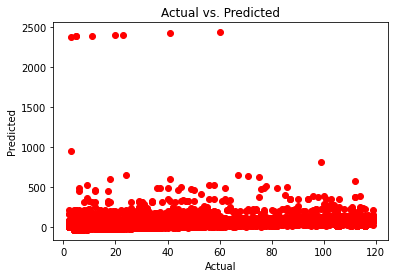

In [8]:
plt.plot(data['Duration'], yhat, 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [9]:
sqrt(mean_squared_error(data['Duration'],yhat))

10.47479273249597

### Observations
- From the above graphs we can observe that there are few misfits in the data. This can be seen in the 3rd graph where there are few predicted values above 2000 minutes. This might be because the model is highly dependent on few columns like Pmonth and Dmonth. With a small change in these column values the prediction is greately affected.

- Based on the coefficient values we can come to an understanding that all of the points above 2000 minutes in 3rd graph are the instances where the pickup month and the drop of month are not the same.

- The RMSE of the model is 10.48 minutes.

## Predictive models

Separate Training and Test Data

In [10]:
from sklearn.model_selection import train_test_split

data2 = data[data['Pday']==data['Dday']]

featureNames = ['Distance','Haversine','Temp','Precip','Wind','Humid','Solar','Snow','GroundTemp','Dust',
                'Phour', 'Pmin', 'Dmonth', 'Dday', 'Dhour', 'Dmin']

data['const'] = 1
featureNames = ['const'] + list(featureNames)

X_training, X_test, y_training, y_test = train_test_split(data2[featureNames], data2['Duration'],
                                                             test_size=0.05,
                                                          random_state = 42
                                                            )

print(f'Training samples: {X_training.shape[0]}')
print(f'Test samples: {X_test.shape[0]}')

Training samples: 986414
Test samples: 51917


In [11]:
X_training

,const,Distance,Haversine,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust,Phour,Pmin,Dmonth,Dday,Dhour,Dmin
527564,1,4.10,0.000000,13.2,0.0,2.8,23,2.52,0.0,20.4,28,15,22,3,17,16,26
154468,1,0.44,0.385148,-1.0,0.0,2.7,35,0.64,3.0,-0.3,42,12,42,1,31,12,47
419694,1,1.04,0.000000,6.2,0.0,3.2,61,0.40,0.0,7.2,21,18,32,3,10,19,30
654622,1,2.01,2.558984,8.7,0.0,0.9,70,0.00,0.0,5.4,77,1,11,3,27,1,31
218651,1,3.01,1.941861,2.6,0.0,3.8,57,0.00,0.0,0.0,28,21,34,2,13,22,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261201,1,1.42,0.938616,2.2,0.0,2.0,17,1.99,0.0,4.5,60,12,16,2,21,12,29
368725,1,4.66,2.442534,10.1,0.0,1.8,24,2.12,0.0,15.8,35,15,3,3,6,15,48
132942,1,3.35,0.000000,-13.0,0.0,3.4,29,0.05,0.7,-8.0,20,18,24,1,24,19,9
676861,1,8.56,0.000000,15.6,0.0,3.7,60,1.44,0.0,18.7,59,11,51,3,28,12,35


#### Create Feature Processing Pipeline for the OLS model
- Scale all numerical variables.
- OnehotEncoding all categorical columns.

In [14]:
num_columns_OLS = ['const','Distance','Haversine','Temp','Precip','Wind','Humid','Solar','Snow','GroundTemp','Dust']
cat_columns_OLS = ['Phour', 'Pmin', 'Dmonth', 'Dday', 'Dhour', 'Dmin']

In [15]:
num_pipeline_OLS = Pipeline([('standardize_num', StandardScaler())
                        ])

cat_pipeline_OLS = Pipeline([('create_dummies_cats', OneHotEncoder(drop='first'))
                        ])

processing_pipeline_OLS = ColumnTransformer(transformers=[('proc_numeric', num_pipeline_OLS, num_columns_OLS),
                                                      ('create_dummies', cat_pipeline_, cat_columns_OLS)])

print(processing_pipeline)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('proc_numeric',
                                 Pipeline(memory=None,
                                          steps=[('standardize_num',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True))],
                                          verbose=False),
                                 ['const', 'Distance', 'Haversine', 'Temp',
                                  'Precip', 'Wind', 'Humid', 'Solar', 'Snow',
                                  'GroundTemp', 'Dust']),
                                ('create_dummies',
                                 Pipeline(memory=None,
                                          steps=[('create_dummies_cats',
                       

In [16]:
X_tr = processing_pipeline_OLS.fit_transform(X_training)
y_tr = num_pipeline_OLS.fit_transform(y_training.values.reshape(-1, 1))
X_te = processing_pipeline_OLS.transform(X_test)
y_te = num_pipeline_OLS.transform(y_test.values.reshape(-1, 1))

#### Building and Training an OLS model

In [17]:
ols = smf.OLS(y_tr, X_tr.todense()).fit()
print(ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                          1.032e+05
Date:                Mon, 11 Oct 2021   Prob (F-statistic):                        0.00
Time:                        15:12:12   Log-Likelihood:                      1.3941e+05
No. Observations:              986414   AIC:                                 -2.784e+05
Df Residuals:                  986207   BIC:                                 -2.760e+05
Df Model:                         207                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Observations
- The model has an overall explanatory power of 95.6%.

- For the above model const, x15 - x33 and x130 - x148 columns are significant.


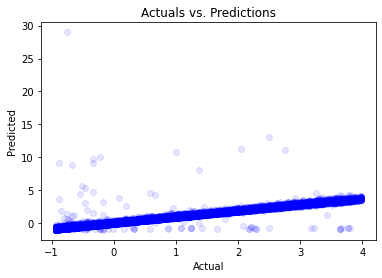

In [19]:
yhat_test_OLS = ols.predict(X_te.todense())

plt.plot(y_te, yhat_test_OLS, 'bo', alpha=0.1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actuals vs. Predictions')
plt.show()

In [22]:
sqrt(mean_squared_error(num_pipeline_OLS.inverse_transform(y_te),num_pipeline_OLS.inverse_transform(yhat_test_OLS)))

5.612749086230054

### Observations
- From the above graphs we can observe that there are also few misfits in the data similar to the before model.

- The RMSE of the model is 5.61 minutes which is nearly half of that of the previous model. 

### Building and training an LinearRegression model.

In [23]:
num_columns = ['Distance','Haversine','Temp','Precip','Wind','Humid','Solar','Snow','GroundTemp','Dust']
cat_columns = ['Phour', 'Pmin', 'Dmonth', 'Dday', 'Dhour', 'Dmin']
num_pipeline = Pipeline([('standardize_num', StandardScaler())
                        ])

cat_pipeline = Pipeline([('create_dummies_cats', OneHotEncoder(drop='first'))
                        ])

processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, num_columns),
                                                      ('create_dummies', cat_pipeline, cat_columns)])

print(processing_pipeline)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('proc_numeric',
                                 Pipeline(memory=None,
                                          steps=[('standardize_num',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True))],
                                          verbose=False),
                                 ['Distance', 'Haversine', 'Temp', 'Precip',
                                  'Wind', 'Humid', 'Solar', 'Snow',
                                  'GroundTemp', 'Dust']),
                                ('create_dummies',
                                 Pipeline(memory=None,
                                          steps=[('create_dummies_cats',
                                

In [24]:
from sklearn.linear_model import LinearRegression

modeling_pipeline = Pipeline([('data_processing', processing_pipeline), ('lm', LinearRegression())])
modeling_pipeline.fit(X_training, y_training)

Pipeline(memory=None,
         steps=[('data_processing',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('proc_numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('standardize_num',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['Distance', 'Haversine',
                                                   'Temp', 'Precip', 'Wind',
               

In [25]:
modeling_pipeline.score(X_training, y_training)

0.9596053481211028

In [26]:
modeling_pipeline.score(X_test, y_test)

0.9482467907956705

In [27]:
modeling_pipeline['lm'].coef_

array([ 1.60888668e+00, -2.70308292e-01,  2.83584712e-02,  5.63743184e-03,
        7.66910066e-03, -1.36963498e-02, -8.17936026e-03,  1.79054519e-03,
        8.94346178e-02,  1.40719731e-02, -5.34073751e+01, -1.06310144e+02,
       -1.58259123e+02, -2.09094811e+02, -2.58392220e+02, -3.09021912e+02,
       -3.61585370e+02, -4.14946673e+02, -4.68046216e+02, -5.21010818e+02,
       -5.74086032e+02, -6.27717764e+02, -6.81317014e+02, -7.34824179e+02,
       -7.88131165e+02, -8.42061849e+02, -8.95923027e+02, -9.49853943e+02,
       -1.00321939e+03, -1.05675081e+03, -1.11044816e+03, -1.16463559e+03,
       -1.21872500e+03, -8.63120197e-01, -1.80737833e+00, -2.59674808e+00,
       -3.60410323e+00, -4.48010968e+00, -5.33044918e+00, -6.27167343e+00,
       -7.11317992e+00, -8.07690119e+00, -8.81577155e+00, -9.69370524e+00,
       -1.06579411e+01, -1.16133144e+01, -1.25876690e+01, -1.33951382e+01,
       -1.43823854e+01, -1.51903189e+01, -1.60849861e+01, -1.69409113e+01,
       -1.78157372e+01, -

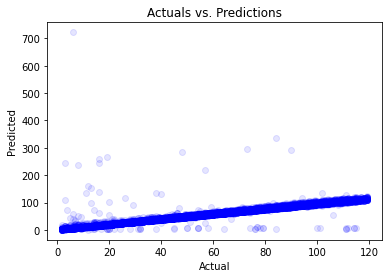

In [28]:
yhat_test = modeling_pipeline.predict(X_test)

plt.plot(y_test, yhat_test, 'bo', alpha=0.1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actuals vs. Predictions')
plt.show()

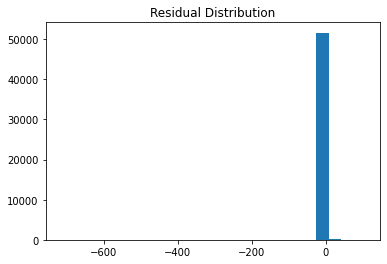

In [29]:
yhat_residuals = y_test - yhat_test

plt.hist(yhat_residuals, bins=25)
plt.title('Residual Distribution')
plt.show()

In [30]:
sqrt(mean_squared_error(y_test,yhat_test))

5.419600963673245

### Observations
- The model has an overall explanatory power of 94.8%
- The RMSE of the model is 5.41 minutes which is nearly equal to that of the previous model. 
- Most of the residuals are 0, that means the model is making a good fit.

### Building and training a Ridge Regression model

In [31]:
from sklearn.linear_model import Ridge

modeling_pipeline_ridge = Pipeline([('data_processing', processing_pipeline), ('ridge', Ridge(alpha=0))])
modeling_pipeline_ridge.fit(X_training, y_training)
modeling_pipeline_ridge['ridge'].coef_

array([ 1.60861140e+00, -2.70016168e-01,  2.82082757e-02,  5.14107452e-03,
        9.18533211e-03, -1.51143809e-02,  1.96566355e-02,  3.31925072e-03,
        3.91204913e-02,  1.50686780e-02, -5.31221003e+01, -1.06079610e+02,
       -1.57920082e+02, -2.09454705e+02, -2.58360663e+02, -3.08750045e+02,
       -3.61227815e+02, -4.14744874e+02, -4.68071189e+02, -5.20996767e+02,
       -5.74001869e+02, -6.27678765e+02, -6.81302388e+02, -7.34812399e+02,
       -7.87958977e+02, -8.41812518e+02, -8.95652820e+02, -9.49538506e+02,
       -1.00297452e+03, -1.05668085e+03, -1.11035183e+03, -1.16462785e+03,
       -1.21849814e+03, -8.48010930e-01, -1.80748541e+00, -2.58634554e+00,
       -3.59381036e+00, -4.46816525e+00, -5.31848437e+00, -6.26175514e+00,
       -7.07739021e+00, -8.05462773e+00, -8.80735138e+00, -9.65913407e+00,
       -1.06327076e+01, -1.16033706e+01, -1.25593138e+01, -1.33925470e+01,
       -1.43767156e+01, -1.51893485e+01, -1.60885216e+01, -1.69510366e+01,
       -1.78462780e+01, -

In [32]:
modeling_pipeline_ridge.score(X_training, y_training)

0.9595905927667692

In [33]:
modeling_pipeline_ridge.score(X_test, y_test)

0.9482233350669267

In [34]:
yhat_rg = modeling_pipeline_ridge.predict(X_test)
sqrt(mean_squared_error(y_test,yhat_test))

5.419600963673245

### Observations
- Ridge regression model at lambda = 0 acts as a simple linear regression.
- The model has an overall explanatory power of 94.8%
- The RMSE of the model is 5.41 minutes which is nearly equal to that of the previous model. 

###  Building and training Ridge Regression models at different $\alpha$ values

In [35]:
from collections import defaultdict
alphas = [0, 1, 2, 5, 10, 50]

ridge_results = defaultdict(dict)

for alph in alphas:
    modeling_pipeline_ridge = Pipeline([('data_processing', processing_pipeline), ('ridge', Ridge(alpha=alph))])
    modeling_pipeline_ridge.fit(X_training, y_training)
    ridge_results['coefficients'][alph] = modeling_pipeline_ridge['ridge'].coef_
    ridge_results['training score'][alph] = modeling_pipeline_ridge.score(X_training, y_training)
    ridge_results['test score'][alph] = modeling_pipeline_ridge.score(X_test, y_test)
print('Finished')

Finished


#### Changes in Coefficient Values

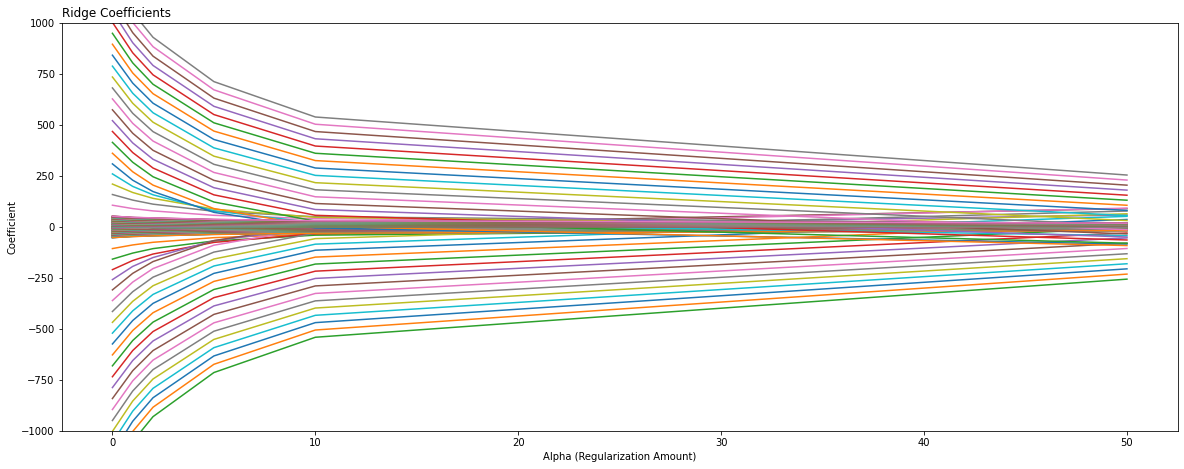

In [36]:
coefficients = pd.DataFrame.from_dict(ridge_results['coefficients'])
coefficients = coefficients.reset_index()
coefficients = coefficients.rename(columns={'index':'coefficient_nbr'})
coefficients = coefficients.melt(id_vars='coefficient_nbr', var_name='alpha', value_name='coefficient')

(
coefficients.pivot_table(index='alpha', columns='coefficient_nbr', values='coefficient')
    .plot(figsize=(20,7.5),legend=False)
)

plt.title('Ridge Coefficients', loc='left')
plt.xlabel('Alpha (Regularization Amount)')
plt.ylabel('Coefficient')
plt.ylim((-1000, 1000))
plt.show()

#### Changes in $R^2$

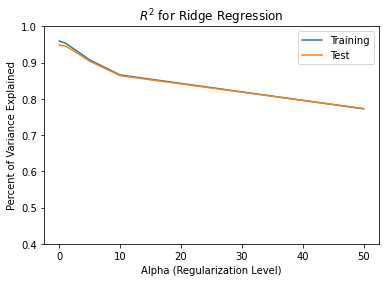

In [37]:
ridge_training_r2 = pd.Series(ridge_results['training score'])
ridge_test_r2 = pd.Series(ridge_results['test score'])

ridge_training_r2.plot()
ridge_test_r2.plot()
plt.title('$R^2$ for Ridge Regression')
plt.legend(['Training','Test'])
plt.xlabel('Alpha (Regularization Level)')
plt.ylabel('Percent of Variance Explained')
plt.ylim(0.4, 1)
plt.show()

### Observations 
-  As the value of alpha keeps increasing most of the coefficients tend to move towards 0 i.e. come close to 0.
- The $R^2$ value of the model keeps decreasing as the alpha value increases, this might be because we might be oversimplifying the model too much.

### Building and training Lasso Regression models at different  $\alpha$  values

In [38]:
from sklearn.linear_model import Lasso

alphas = [1, 2, 5, 10, 50]

lasso_results = defaultdict(dict)

for alph in alphas:
    modeling_pipeline_lasso = Pipeline([('data_processing', processing_pipeline), ('lasso', Lasso(alpha=alph))])
    modeling_pipeline_lasso.fit(X_training, y_training)
    lasso_results['coefficients'][alph] = modeling_pipeline_lasso['lasso'].coef_
    lasso_results['training score'][alph] = modeling_pipeline_lasso.score(X_training, y_training)
    lasso_results['test score'][alph] = modeling_pipeline_lasso.score(X_test, y_test)
    
print('Finished')

Finished


#### Coefficient Values

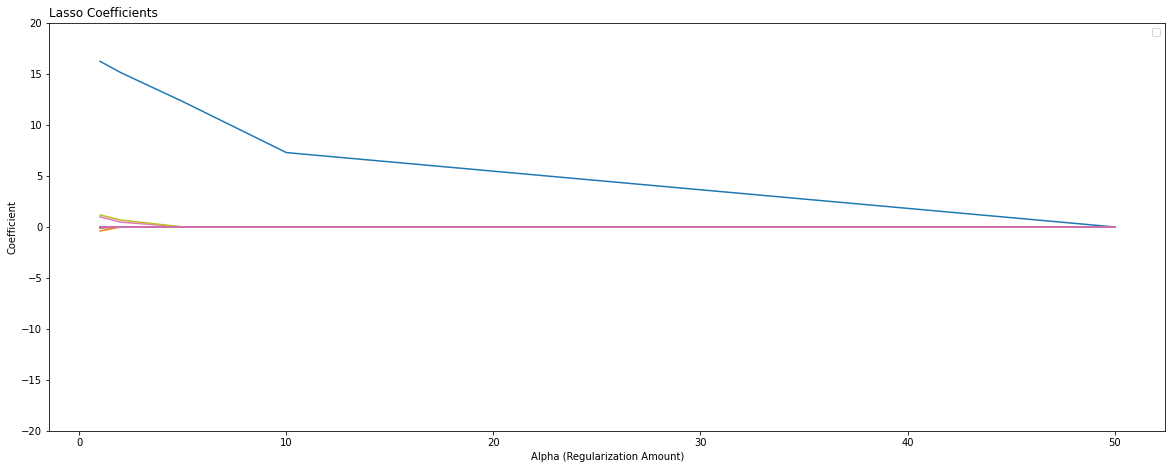

In [39]:
coefficients = pd.DataFrame.from_dict(lasso_results['coefficients'])
coefficients = coefficients.reset_index()
coefficients = coefficients.rename(columns={'index':'coefficient_nbr'})
coefficients = coefficients.melt(id_vars='coefficient_nbr', var_name='alpha', value_name='coefficient')

coefficients.pivot_table(index='alpha', columns='coefficient_nbr', values='coefficient').plot(figsize=(20,7.5))
plt.title('Lasso Coefficients', loc='left')
plt.xlabel('Alpha (Regularization Amount)')
plt.ylabel('Coefficient')
plt.ylim((-20, 20))
plt.legend('')
plt.show()

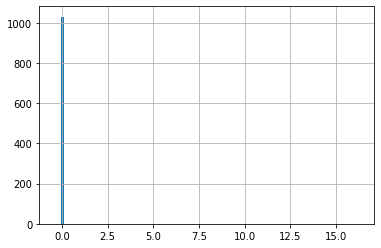

In [40]:
coefficients['coefficient'].hist(bins=100)
plt.show()

#### Changes in $R^2$

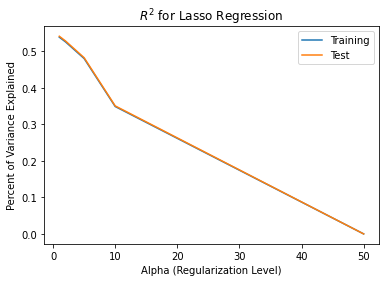

In [41]:
lasso_training_r2 = pd.Series(lasso_results['training score'])
lasso_test_r2 = pd.Series(lasso_results['test score'])

lasso_training_r2.plot()
lasso_test_r2.plot()
plt.title('$R^2$ for Lasso Regression')
plt.legend(['Training','Test'])
plt.xlabel('Alpha (Regularization Level)')
plt.ylabel('Percent of Variance Explained')
plt.show()


### Observations
- As the value of alpha keeps increasing all of the coefficients tend to become 0 we can observe this when $\alpha$  = 50.
- The $R^2$ value of the model keeps dropping as we keep on increasing the  $\alpha$ value.
- The $R^2$ became 0 when $\alpha$ = 50. 